In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import csv
import torch
from model import CNNCrown
from verifier import ABCrown
from torchvision.transforms import ToTensor
from torchvision import datasets, transforms

In [20]:
model_weigths_file = "./custom_model_2.pt"
log_file_name = "custom_model.csv"
n_images = 1   # number of images to test
epsilon_list = torch.linspace(0.01, 0.05, 5)
device = 'cpu'
torch.manual_seed(0)

In [22]:
# loading the model
n_classes = 10
image_dimension = (3, 32, 32)
net = CNNCrown(image_dimension[0], n_classes)
net.load_state_dict(torch.load(model_weigths_file, map_location=device))
net = net.eval()

In [23]:
# getting the images
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

images_dataset = datasets.CIFAR10(root="data", train=False, download=True, transform=ToTensor())
selected_images = []

# select images that are corrctly classified
for i in range(len(images_dataset)):
    image, label = images_dataset[i]
    logits = net(image.unsqueeze(0))
    prediction = torch.argmax(logits, dim=1)[0].item()
    if prediction == label:
            selected_images.append((image, label))
            
    if len(selected_images) == n_images:
        break

In [24]:
# setting the verifier
verifier = ABCrown(device=device)

In [25]:
error_adversarial_example = -torch.ones_like(selected_images[0][0]).to(device)  # when an error occurs or no adversarial images are found, a Tensor with -1s is saved

# opening the csv
with open(log_file_name, mode="w", newline="") as file:
    # writing the header
    writer = csv.DictWriter(file, fieldnames=['image_id', 'eps', 'status', 'success'])
    writer.writeheader()
    adversarial_examples = []
    # iterating through the images
    for i, (image, label) in enumerate(selected_images):
        adversarial_example_per_image = []
        # iterating thtough the epsilons
        for eps in epsilon_list:
            # if there is an error, don't crash
            result = None
            try:
                result = verifier.verify(net, image, n_classes, label, eps.item()).as_dict()
            except Exception as error:
                # save a dummy tensor (all -1s)
                print(f"> Error at image {i} and eps={eps}: {error}")
                info_to_save = {
                    "image_id": i,
                    "eps": eps.item(),
                    "status": "CRASH",
                    "success": False,
                }
                adversarial_example_per_image.append(error_adversarial_example)
                writer.writerow(info_to_save)
                file.flush()
            
            if result is not None:
                # saving result
                info_to_save = {
                    "image_id": i,
                    "eps": eps.item(),
                    "status": result['status'],
                    "success": result['success'],
                }
                writer.writerow(info_to_save)
                file.flush()
                
                # saving adversarial example
                if result['stats']['attack_examples'].shape[0] != 0:
                    adversarial_example_per_image.append(result['stats']['attack_examples'][0])
                else:
                    adversarial_example_per_image.append(error_adversarial_example)
                
        adversarial_examples.append(torch.stack(adversarial_example_per_image))

# saving the obtained adversarial examples
adversarial_examples = torch.stack(adversarial_examples)
torch.save(adversarial_examples, "adversarial_examples.pt")

Specification DNF: (y[3] > y[0]) & (y[3] > y[1]) & (y[3] > y[2]) & (y[3] > y[4]) & (y[3] > y[5]) & (y[3] > y[6]) & (y[3] > y[7]) & (y[3] > y[8]) & (y[3] > y[9])
Attack parameters: initialization=uniform, steps=100, restarts=30, alpha=0.002500005066394806, GAMA=False
PGD attack margin (first 2 examples and 10 specs):
 tensor([[8.41230011, 7.70893621, 7.21135998, 6.30057955, 5.39595318, 6.36019897,
         6.74287224, 7.31920862, 6.57506609]])
Total number of violation:  0
Processing batch 1/1...


  4%|▍         | 4/100 [00:03<01:24,  1.14it/s]

pgd early stop
PGD attack margin (first 2 examples and 10 specs):
 tensor([[ 1.15409827,  1.18017483,  1.04588652,  0.14245310, -0.01785678,
          0.99063647,  0.99636912,  1.35921574,  1.15682375]])
Total number of violation:  1
Attack finished in 3.5512 seconds.
PGD attack succeeded!

Checking and Saving Counterexample in check_and_save_cex

verified_status unsafe-pgd
verified_success True


Specification DNF: (y[3] > y[0]) & (y[3] > y[1]) & (y[3] > y[2]) & (y[3] > y[4]) & (y[3] > y[5]) & (y[3] > y[6]) & (y[3] > y[7]) & (y[3] > y[8]) & (y[3] > y[9])
Attack parameters: initialization=uniform, steps=100, restarts=30, alpha=0.005000002682209015, GAMA=False
PGD attack margin (first 2 examples and 10 specs):
 tensor([[8.46466160, 7.74942160, 7.24894810, 6.33937454, 5.40363741, 6.38186836,
         6.77711630, 7.35718918, 6.60519886]])
Total number of violation:  0
Processing batch 1/1...


  1%|          | 1/100 [00:01<02:15,  1.37s/it]

pgd early stop
PGD attack margin (first 2 examples and 10 specs):
 tensor([[ 0.24108136,  0.37910643,  0.25415760, -0.45499822, -0.20528960,
          0.25416583,  0.44482476,  0.65679181,  0.50018555]])
Total number of violation:  2
Attack finished in 1.4016 seconds.
PGD attack succeeded!

Checking and Saving Counterexample in check_and_save_cex

verified_status unsafe-pgd
verified_success True


Specification DNF: (y[3] > y[0]) & (y[3] > y[1]) & (y[3] > y[2]) & (y[3] > y[4]) & (y[3] > y[5]) & (y[3] > y[6]) & (y[3] > y[7]) & (y[3] > y[8]) & (y[3] > y[9])
Attack parameters: initialization=uniform, steps=100, restarts=30, alpha=0.007500007748603821, GAMA=False
PGD attack margin (first 2 examples and 10 specs):
 tensor([[8.52192593, 7.79446697, 7.29064751, 6.38252115, 5.41539049, 6.40668201,
         6.81527519, 7.39910173, 6.63818455]])
Total number of violation:  0
Processing batch 1/1...


  1%|          | 1/100 [00:01<02:27,  1.49s/it]

pgd early stop
PGD attack margin (first 2 examples and 10 specs):
 tensor([[-0.18871522, -0.06023811, -0.02361926, -0.98168564, -0.09165135,
         -0.13385963,  0.08739266,  0.25736478,  0.09813941]])
Total number of violation:  6
Attack finished in 1.5149 seconds.
PGD attack succeeded!

Checking and Saving Counterexample in check_and_save_cex

verified_status unsafe-pgd
verified_success True


Specification DNF: (y[3] > y[0]) & (y[3] > y[1]) & (y[3] > y[2]) & (y[3] > y[4]) & (y[3] > y[5]) & (y[3] > y[6]) & (y[3] > y[7]) & (y[3] > y[8]) & (y[3] > y[9])
Attack parameters: initialization=uniform, steps=100, restarts=30, alpha=0.01000000536441803, GAMA=False
PGD attack margin (first 2 examples and 10 specs):
 tensor([[8.56821346, 7.82904482, 7.32090664, 6.41582966, 5.41445494, 6.42216587,
         6.84158897, 7.43133068, 6.66205740]])
Total number of violation:  0
Processing batch 1/1...


  1%|          | 1/100 [00:01<02:20,  1.42s/it]

pgd early stop
PGD attack margin (first 2 examples and 10 specs):
 tensor([[-0.12357631, -0.10212851, -0.16524255, -2.35435009, -0.09558129,
         -0.25216788, -0.14198664, -0.01999974, -0.06393522]])
Total number of violation:  9
Attack finished in 1.4509 seconds.
PGD attack succeeded!

Checking and Saving Counterexample in check_and_save_cex

verified_status unsafe-pgd
verified_success True


Specification DNF: (y[3] > y[0]) & (y[3] > y[1]) & (y[3] > y[2]) & (y[3] > y[4]) & (y[3] > y[5]) & (y[3] > y[6]) & (y[3] > y[7]) & (y[3] > y[8]) & (y[3] > y[9])
Attack parameters: initialization=uniform, steps=100, restarts=30, alpha=0.012500002980232239, GAMA=False
PGD attack margin (first 2 examples and 10 specs):
 tensor([[8.60123634, 7.85048342, 7.33753681, 6.43613386, 5.39793873, 6.42513990,
         6.85333395, 7.45129681, 6.67363310]])
Total number of violation:  0
Processing batch 1/1...


  1%|          | 1/100 [00:01<02:20,  1.41s/it]

pgd early stop
PGD attack margin (first 2 examples and 10 specs):
 tensor([[-0.22959566, -0.36259031, -0.27710295, -4.98285675, -0.18087232,
         -0.64362645, -0.57588673, -0.37859321, -0.42233109]])
Total number of violation:  9
Attack finished in 1.4432 seconds.
PGD attack succeeded!

Checking and Saving Counterexample in check_and_save_cex

verified_status unsafe-pgd
verified_success True


WARNING  17:29:40     [image.py:661] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.04098039..1.01].
WARNING  17:29:40     [image.py:661] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.030980393..1.02].
WARNING  17:29:40     [image.py:661] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.020980392..1.03].
WARNING  17:29:40     [image.py:661] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.010980394..1.04].
WARNING  17:29:40     [image.py:661] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.008823529..1.05].


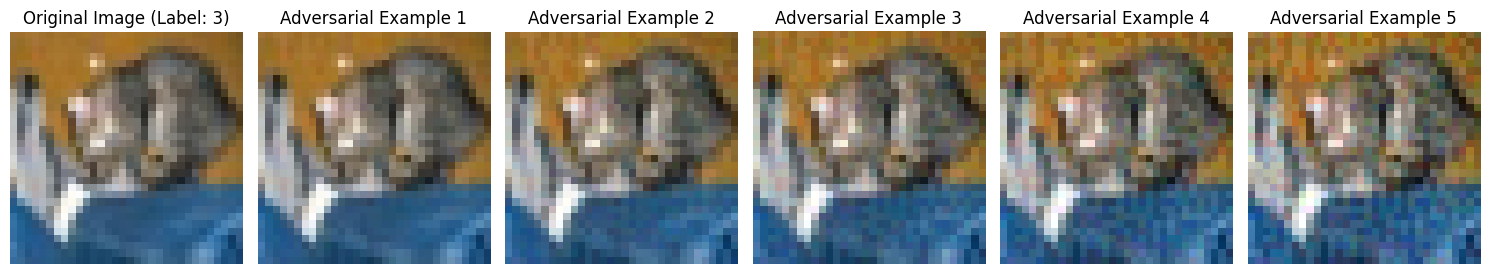

In [26]:
# NORMAL MODEL

import matplotlib.pyplot as plt

# Extract the selected image and its label
selected_image, label = selected_images[0]

# Extract the adversarial examples for the selected image
adversarial_examples_for_image = adversarial_examples[0]

# Plot the original image
plt.figure(figsize=(15, 5))
plt.subplot(1, len(adversarial_examples_for_image) + 1, 1)
plt.imshow(selected_image.permute(1, 2, 0).numpy())
plt.title(f"Original Image (Label: {label})")
plt.axis('off')

# Plot the adversarial examples
for idx, adv_example in enumerate(adversarial_examples_for_image):
    plt.subplot(1, len(adversarial_examples_for_image) + 1, idx + 2)
    plt.imshow(adv_example.permute(1, 2, 0).detach().cpu().numpy())
    plt.title(f"Adversarial Example {idx + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

WARNING  17:27:16     [image.py:661] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.04098039..1.01].
WARNING  17:27:16     [image.py:661] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.030980393..1.02].
WARNING  17:27:16     [image.py:661] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.020980392..1.03].
WARNING  17:27:16     [image.py:661] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.010980394..1.04].
WARNING  17:27:16     [image.py:661] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.008823529..1.05].


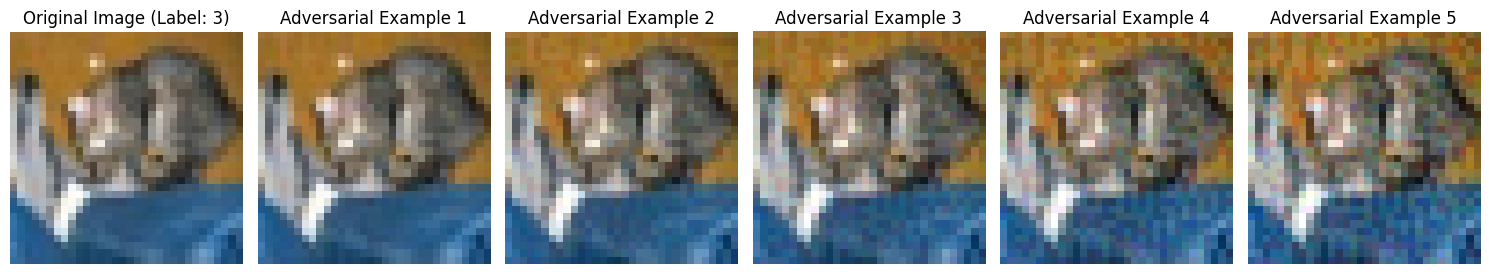

In [15]:
# CUSTOM MODEL

import matplotlib.pyplot as plt

# Extract the selected image and its label
selected_image, label = selected_images[0]

# Extract the adversarial examples for the selected image
adversarial_examples_for_image = adversarial_examples[0]

# Plot the original image
plt.figure(figsize=(15, 5))
plt.subplot(1, len(adversarial_examples_for_image) + 1, 1)
plt.imshow(selected_image.permute(1, 2, 0).numpy())
plt.title(f"Original Image (Label: {label})")
plt.axis('off')

# Plot the adversarial examples
for idx, adv_example in enumerate(adversarial_examples_for_image):
    plt.subplot(1, len(adversarial_examples_for_image) + 1, idx + 2)
    plt.imshow(adv_example.permute(1, 2, 0).detach().cpu().numpy())
    plt.title(f"Adversarial Example {idx + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
a = CNNCrown()
a.load_state_dict(torch.load("custom_model.pt", map_location=device))

b = CNNCrown()
a.load_state_dict(torch.load("custom_model.pt2", map_location=device))

